# **1. Import Modules**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **2. Import Data**

In [4]:
df = pd.read_excel('Data/Super-Store-2021.xlsx')

In [3]:
df.head()

,Category,City,Country/Region,Customer ID,Customer Name,Order Date,Order ID,Postal Code,Product ID,Product Name,...,Ship Status,State,Sub-Category,Days to Ship Actual,Days to Ship Scheduled,Discount,Profit,Quantity,Sales,Sales Forecast
0,Furniture,Henderson,United States,CG-12520,Claire Gute,2020-11-08,CA-2020-152156,42420.0,FUR-BO-10001798,Bush Somerset Collection Bookcase,...,Shipped On Time,Kentucky,Bookcases,3,3,0.00,42,2,262,392
1,Furniture,Henderson,United States,CG-12520,Claire Gute,2020-11-08,CA-2020-152156,42420.0,FUR-CH-10000454,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",...,Shipped On Time,Kentucky,Chairs,3,3,0.00,220,3,732,1096
2,Office Supplies,Los Angeles,United States,DV-13045,Darrin Van Huff,2020-06-12,CA-2020-138688,90036.0,OFF-LA-10000240,Self-Adhesive Address Labels for Typewriters b...,...,Shipped Late,California,Labels,4,3,0.00,7,2,15,22
3,Furniture,Fort Lauderdale,United States,SO-20335,Sean O'Donnell,2019-10-11,US-2019-108966,33311.0,FUR-TA-10000577,Bretford CR4500 Series Slim Rectangular Table,...,Shipped Late,Florida,Tables,7,6,0.45,-383,5,958,1434
4,Office Supplies,Fort Lauderdale,United States,SO-20335,Sean O'Donnell,2019-10-11,US-2019-108966,33311.0,OFF-ST-10000760,Eldon Fold 'N Roll Cart System,...,Shipped Late,Florida,Storage,7,6,0.20,3,2,22,33


In [4]:
df.columns

Index(['Category', 'City', 'Country/Region', 'Customer ID', 'Customer Name',
       'Order Date', 'Order ID', 'Postal Code', 'Product ID', 'Product Name',
       'Region', 'Row ID', 'Segment', 'Ship Date', 'Ship Mode', 'Ship Status',
       'State', 'Sub-Category', 'Days to Ship Actual',
       'Days to Ship Scheduled', 'Discount', 'Profit', 'Quantity', 'Sales',
       'Sales Forecast'],
      dtype='object')

# **3. Assignments**

-	Total Revenue = sum of Sales
-	Total Profit = sum of Profit
-	Profit Ratio = Total Profit / Total Profit
-	Customer = count distinct Customer
-	Sales per Customer = Total Revenue/# Customer
-	#Quantity: = sum of Quantity

In [5]:
#Total Revenue = sum of Sales
sales = "${:,.0f}".format(df['Sales'].sum())
sales

'$2,297,354'

In [6]:
# Total Profit = sum of Profit
profit = "${:,.0f}".format(df['Profit'].sum())
profit

'$286,347'

In [7]:
# Profit Ratio = Total Profit / Total Profit
"{:,.1f}%".format(df['Profit'].sum() *100/ df['Sales'].sum())

'12.5%'

In [8]:
df['Customer ID'].nunique()

793

In [ ]:
# Sales per Customer = Total Revenue/# Customer
# Quantity: = sum of Quantity

2.	Using bar chart to visualize Total Revenue/ Total Profit /# Customer/ Sales per Customer/ Quantity by Region. If you are the analyst, what should you comment based on this information.
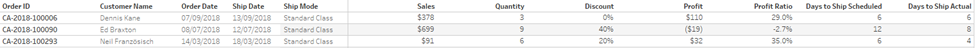

In [1]:
df_region = pd.DataFrame({'Revenue': df.groupby('Region')['Sales'].sum(),
                        'Profit' : df.groupby('Region')['Profit'].sum(),
                        'No. Customer': df.groupby('Region')['Customer ID'].nunique(),
                        'Quantity' :df.groupby('Region')['Quantity'].sum()
                        }).reset_index()

df_region

NameError: name 'df' is not defined

In [10]:
df_region['Sales per customer'] = df_region['Revenue'] / df_region['No. Customer']

In [11]:
df_region

,Region,Revenue,Profit,No. Customer,Quantity,Sales per customer
0,Central,501256,39719,629,8780,796.909380
1,East,678834,91521,674,10618,1007.172107
2,South,391750,46721,512,6209,765.136719
3,West,725514,108386,686,12266,1057.600583


<BarContainer object of 4 artists>

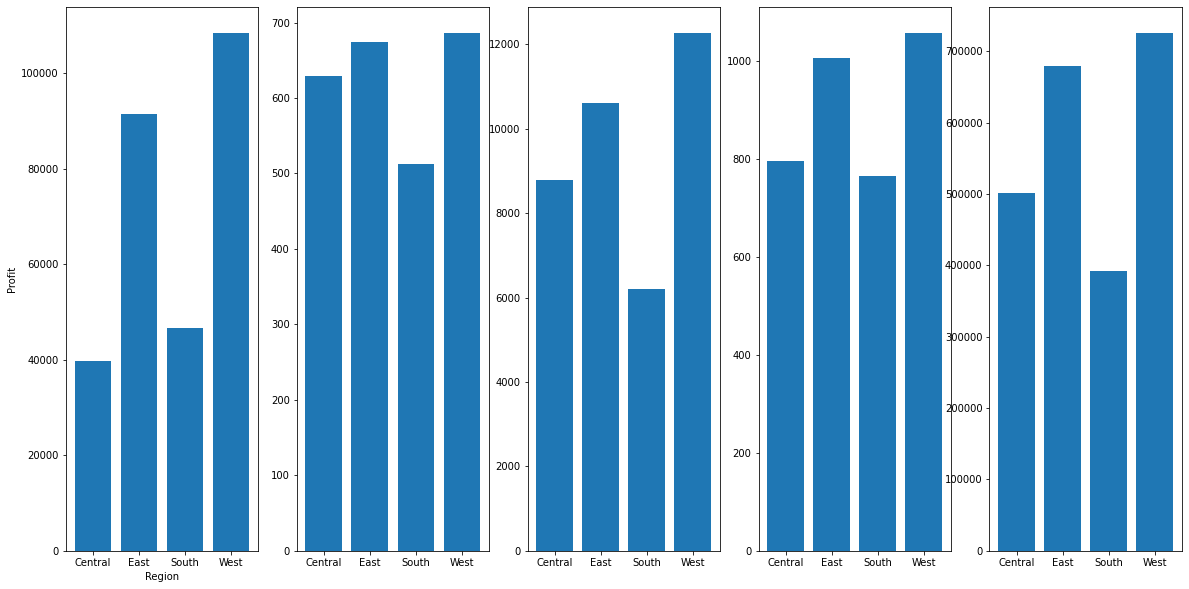

In [ ]:
fig, ax = plt.subplots(ncols= 5, figsize = (20,10))

ax[0].bar(df_region['Region'] , df_region['Profit'])
ax[0].set(xlabel = 'Region', ylabel = 'Profit')

ax[1].bar(df_region['Region'] , df_region['No. Customer'])

ax[2].bar(df_region['Region'] , df_region['Quantity'])

ax[3].bar(df_region['Region'] , df_region['Sales per customer'])

ax[4].bar(df_region['Region'] , df_region['Revenue'])

3.	Using cross-tab table to create dataframe about detail of product as below:
 
![image.png](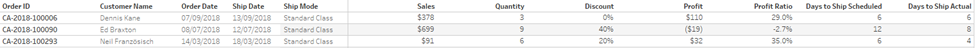
)

In [ ]:
df_table = pd.pivot_table(data = df , index = ['Order ID' , 'Customer Name' , 'Order Date' , 'Ship Date' , 'Ship Mode']
                ,values = ['Sales', 'Quantity' , 'Discount' , 'Profit' , 'Days to Ship Scheduled' , 'Days to Ship Actual']
                ,aggfunc = {'Sales' : sum,
                            'Quantity': sum,
                            'Discount' : np.mean,
                            'Profit': sum,
                            'Days to Ship Scheduled': np.mean,
                            'Days to Ship Actual' : np.mean} ).reset_index()

In [ ]:
df[df['Order ID'] == 'CA-2018-100090']

,Category,City,Country/Region,Customer ID,Customer Name,Order Date,Order ID,Postal Code,Product ID,Product Name,...,Ship Status,State,Sub-Category,Days to Ship Actual,Days to Ship Scheduled,Discount,Profit,Quantity,Sales,Sales Forecast
6287,Furniture,San Francisco,United States,EB-13705,Ed Braxton,2018-07-08,CA-2018-100090,94122.0,FUR-TA-10003715,Hon 2111 Invitation Series Corner Table,...,Shipped Early,California,Tables,4,6,0.2,-88,3,502,753
6288,Office Supplies,San Francisco,United States,EB-13705,Ed Braxton,2018-07-08,CA-2018-100090,94122.0,OFF-BI-10001597,"Wilson Jones Ledger-Size, Piano-Hinge Binder, ...",...,Shipped Early,California,Binders,4,6,0.2,69,6,197,295


In [ ]:
df_table['Discount'] = (df_table['Discount'] * 100).map("{:,.0f}%".format)

In [ ]:
df_table

,Order ID,Customer Name,Order Date,Ship Date,Ship Mode,Days to Ship Actual,Days to Ship Scheduled,Discount,Profit,Quantity,Sales
0,CA-2018-100006,Dennis Kane,2018-09-07,2018-09-13,Standard Class,6,6,0%,110,3,378
1,CA-2018-100090,Ed Braxton,2018-07-08,2018-07-12,Standard Class,4,6,20%,-19,9,699
2,CA-2018-100293,Neil Französisch,2018-03-14,2018-03-18,Standard Class,4,6,20%,32,6,91
3,CA-2018-100328,Jasper Cacioppo,2018-01-28,2018-02-03,Standard Class,6,6,20%,1,1,4
4,CA-2018-100363,Jim Mitchum,2018-04-08,2018-04-15,Standard Class,7,6,20%,8,5,21
...,...,...,...,...,...,...,...,...,...,...,...
5004,US-2021-168802,Jack O'Briant,2021-11-03,2021-11-07,Standard Class,4,6,20%,6,4,18
5005,US-2021-169320,Lena Hernandez,2021-07-23,2021-07-25,Second Class,2,3,0%,16,7,172
5006,US-2021-169488,Allen Armold,2021-09-07,2021-09-09,First Class,2,1,0%,27,7,57
5007,US-2021-169502,Matthew Grinstein,2021-08-28,2021-09-01,Standard Class,4,6,0%,33,8,114


4.	Using the provided data, ask some question
-	Which shipping mode does the customer choose based on the category and #Quantity?
-	Which product was buy the most in Revenue? in #Quantity?


In [ ]:
df_ship_mode = pd.pivot_table(data = df,
                        index = ['Ship Mode', 'Category']
                        ,values = 'Quantity'
                        ,aggfunc = sum
)
df_ship_mode

Quantity
Ship Mode      Category                 
First Class    Furniture            1238
               Office Supplies      3372
               Technology           1083
Same Day       Furniture             453
               Office Supplies      1147
               Technology            360
Second Class   Furniture            1569
               Office Supplies      4480
               Technology           1374
Standard Class Furniture            4768
               Office Supplies     13907
               Technology           4122

In [ ]:
df_product = pd.pivot_table(data = df,
                            index = 'Product Name',
                            values = ['Sales' , 'Quantity'],
                            aggfunc = sum).reset_index()

In [ ]:
df_product[df_product['Quantity'] == 215]

,Product Name,Quantity,Sales
1498,Staples,215,755


In [ ]:
df_product.sort_values(by = 'Sales', ascending = False)

,Product Name,Quantity,Sales
404,Canon imageCLASS 2200 Advanced Copier,20,61600
649,Fellowes PB500 Electric Punch Plastic Comb Bin...,31,27454
444,Cisco TelePresence System EX90 Videoconferenci...,6,22638
785,HON 5400 Series Task Chairs for Big and Tall,39,21870
685,GBC DocuBind TL300 Electric Binding System,37,19824
...,...,...,...
1779,Xerox 1989,2,8
783,Grip Seal Envelopes,2,7
1792,Xerox 20,1,6
208,Avery 5,2,6


In [ ]:
df_cus = pd.pivot_table(data = df,
                        index = 'Customer ID',
                        values = ['Sales' , 'Profit'],
                        aggfunc = sum).reset_index()

In [ ]:
df_cus['Profit Ratio'] = df_cus['Profit']/ df_cus['Sales']

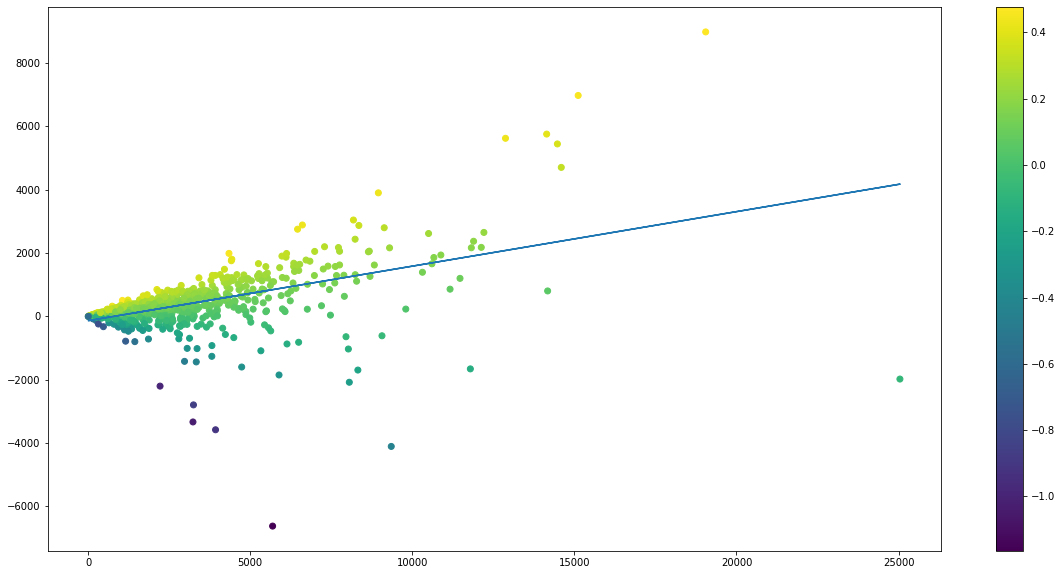

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
x = df_cus['Sales']
y = df_cus['Profit']
chart1 = plt.scatter(df_cus['Sales'], df_cus['Profit'] , c= df_cus['Profit Ratio'])

z = np.polyfit(x,y,1)
p = np.poly1d(z)

plt.plot(x,p(x))
fig.colorbar(chart1)